## Neccessary packages/libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from scipy import stats
import seaborn as sns

In [ ]:
df = pd.read_csv("/Users/Emily_Vanilla/Downloads/spotify-2023.csv", encoding= 'latin-1')
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


## Remove row and convert to integers

In [ ]:
for ii in range (0,953):
    if df['streams'].iloc[ii] == 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3':
        print(ii)
df = df.drop(574)

574


In [ ]:
df['streams'] = df['streams'].astype(str).astype(int)
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                  int64
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

## Select only integer variables

In [ ]:
numerics = ['int64']
df_int = df.select_dtypes(include=numerics)
df_int

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,2,2023,7,14,553,147,141381703,43,263,10,125,80,89,83,31,0,8,4
1,1,2023,3,23,1474,48,133716286,48,126,14,92,71,61,74,7,0,10,4
2,1,2023,6,30,1397,113,140003974,94,207,14,138,51,32,53,17,0,31,6
3,1,2019,8,23,7858,100,800840817,116,207,12,170,55,58,72,11,0,11,15
4,1,2023,5,18,3133,50,303236322,84,133,15,144,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,1,2022,11,3,953,0,91473363,61,13,1,144,60,24,39,57,0,8,3
949,1,2022,10,21,1180,0,121871870,4,0,0,166,42,7,24,83,1,12,6
950,2,2022,11,3,573,0,73513683,2,0,0,92,80,81,67,4,0,8,6
951,3,2022,10,20,1320,0,133895612,29,26,0,97,82,67,77,8,0,12,5


In [ ]:
y = df_int['streams']
X = df_int.drop('streams', axis = 1)

## Split into training and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scale X

In [ ]:
# Run standardization on X variables
X_train_scaled, X_test_scaled = scale(X_train), scale(X_test)
X_train_scaled

array([[-0.61187336,  0.33259251,  1.11350292, ..., -0.18649792,
         0.95111296, -0.72740452],
       [-0.61187336, -0.02769632, -0.8663469 , ..., -0.18649792,
        -0.22507548, -0.72740452],
       [-0.61187336,  0.33259251, -1.43201828, ..., -0.18649792,
         0.36301874,  0.11099736],
       ...,
       [-0.61187336,  0.33259251, -0.30067552, ..., -0.18649792,
        -0.59263437, -0.62260428],
       [-0.61187336,  0.33259251,  0.83066724, ..., -0.18649792,
        -0.44561081,  0.00619712],
       [-0.61187336,  0.42266471, -0.58351121, ..., -0.18649792,
        -0.44561081, -0.51780405]])

standardize each original feature to be on the same scale before generating the principal components. principal component computation is based on variance, which is impacted by the range of the features. We use the scale() method from sklearn.preprocessing to standardize the original features, i.e., center to the mean and scale to unit variance.


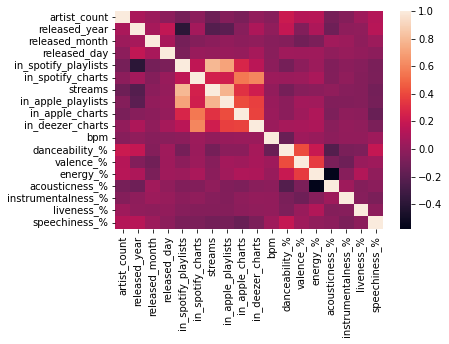

In [ ]:
sns.heatmap(df_int.corr());

## Linear Regression

In [ ]:
# Define cross-validation folds
cv = KFold(n_splits=10, shuffle=True, random_state=42)
lin_reg = LinearRegression().fit(X_train_scaled, y_train)
lr_scores = -1 * cross_val_score(lin_reg,
                                 X_train_scaled,
                                 y_train,
                                 cv=cv,
                                 scoring='neg_root_mean_squared_error')
lr_scores

array([3.11762152e+08, 2.51684163e+08, 2.89425094e+08, 4.29117282e+08,
       3.98673072e+08, 2.96653126e+08, 2.61531090e+08, 3.02035801e+08,
       2.39205769e+08, 2.86022951e+08])

In [ ]:
lr_score_train = np.mean(lr_scores)
lr_score_train

306611049.9236315

In [ ]:
y_predicted = lin_reg.predict(X_test_scaled)
lr_score_test = mean_squared_error(y_test, y_predicted, squared=False) # RMSE instead of MSE
lr_score_test

292774138.39436185

## Lasso Regression

In [ ]:
lasso_reg = LassoCV().fit(X_train_scaled, y_train)
lasso_reg.score(X_train_scaled, y_train)

0.7434895538017922

In [ ]:
lasso_scores = -1 * cross_val_score(lasso_reg,
                                    X_train_scaled,
                                    y_train,
                                    cv=cv,
                                    scoring='neg_root_mean_squared_error')
lasso_scores

array([3.12696685e+08, 2.51908573e+08, 2.91669961e+08, 4.20548511e+08,
       3.99722875e+08, 2.96485713e+08, 2.63241955e+08, 3.01628235e+08,
       2.38093000e+08, 2.87350535e+08])

In [ ]:
lasso_score_train = np.mean(lasso_scores)
lasso_score_train

306334604.1899403

In [ ]:
y_predicted = lasso_reg.predict(X_test_scaled)
lasso_score_test = mean_squared_error(y_test, y_predicted, squared=False)
lasso_score_test

290567654.3203313

## Ridge Regression

In [ ]:
ridge_reg = RidgeCV().fit(X_train_scaled, y_train)
ridge_reg.score(X_train_scaled, y_train)

0.7441327442217962

In [ ]:
ridge_scores = -1 * cross_val_score(ridge_reg,
                                    X_train_scaled,
                                    y_train,
                                    cv=cv,
                                    scoring='neg_root_mean_squared_error')
ridge_scores

array([3.12991306e+08, 2.50680919e+08, 2.89906763e+08, 4.19520205e+08,
       3.99433513e+08, 2.97085412e+08, 2.62860604e+08, 3.02292178e+08,
       2.39762727e+08, 2.86702196e+08])

In [ ]:
ridge_score_train = np.mean(ridge_scores)
ridge_score_train

306123582.2034484

In [ ]:
y_predicted = ridge_reg.predict(X_test_scaled)
ridge_score_test = mean_squared_error(y_test, y_predicted, squared=False)
ridge_score_test

291044543.134423

## Principal Components Regression

In [ ]:
lin_reg = LinearRegression()
rmse_list = []

In [ ]:
# First generate all the principal components
pca = PCA()
X_train_pc = pca.fit_transform(X_train_scaled)
X_train_pc.shape

(761, 17)

In [ ]:
# View explained variance ratio for each principal component
pca.explained_variance_ratio_

array([0.16125949, 0.13096474, 0.08690829, 0.07217323, 0.06842345,
       0.06294002, 0.06031221, 0.05940159, 0.05396414, 0.04856462,
       0.04451451, 0.03849705, 0.03306171, 0.03092118, 0.0199541 ,
       0.01777735, 0.01036234])

In [ ]:
# View first 5 rows of all principal components
pd.DataFrame(pca.components_.T).loc[:4,:]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.045321,-0.264018,-0.072833,-0.232003,0.059674,-0.081004,0.513003,0.128890,0.430764,-0.229295,0.567692,0.018891,-0.128389,-0.019022,-0.002436,0.018376,0.035355
1,-0.111061,-0.317579,0.462198,0.061242,0.032521,0.027989,0.012507,0.033667,-0.276389,0.064510,0.109079,-0.580555,-0.148928,-0.411661,0.172323,0.068989,0.103474
2,-0.077655,0.046972,0.219478,-0.150849,0.563298,0.283881,0.286435,-0.071008,0.128941,-0.366287,-0.518616,0.007460,0.040478,0.026176,0.100498,0.000839,0.060191
3,0.014892,-0.088714,0.213816,-0.145992,0.364883,0.466585,-0.528221,-0.084468,0.036867,0.098761,0.445963,0.227157,-0.058939,0.146314,0.013392,0.015459,0.031411
4,0.388269,0.214638,-0.398260,-0.121496,0.158130,0.092004,0.061413,0.090952,-0.087549,0.182784,0.067605,-0.166667,0.014230,-0.056728,0.452178,-0.066190,0.546445


In [ ]:
for i in range(1, X_train_pc.shape[1]+1):
    rmse_score = -1 * cross_val_score(lin_reg,
                                      X_train_pc[:,:i], # Use first k principal components
                                      y_train,
                                      cv=cv,
                                      scoring='neg_root_mean_squared_error').mean()
    rmse_list.append(rmse_score)

In [ ]:
rmse_list

[439900754.98953897,
 411054233.99487406,
 384649918.5826704,
 374065958.9847132,
 361661108.0407079,
 352974787.0669968,
 353524504.0756589,
 352277322.659775,
 349399098.02062434,
 342332723.7294415,
 341855151.663242,
 318209951.30955154,
 318940801.73853666,
 316657972.73308307,
 303356423.8995058,
 303900909.4137385,
 306611049.9236315]

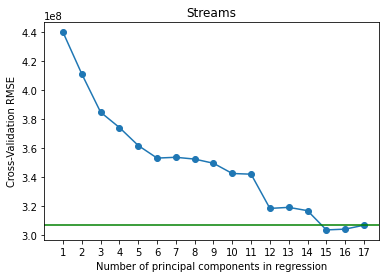

In [ ]:
# Plot RMSE vs count of principal components used
plt.plot(rmse_list, '-o')
plt.xlabel('Number of principal components in regression')
plt.ylabel('Cross-Validation RMSE')
plt.title('Streams')
plt.xlim(xmin=-1);
plt.xticks(np.arange(X_train_pc.shape[1]), np.arange(1, X_train_pc.shape[1]+1))
plt.axhline(y=lr_score_train, color='g', linestyle='-');

In [ ]:
# Visually determine optimal number of principal components
best_pc_num = 15

In [ ]:
# Train model on training set
lin_reg_pc = LinearRegression().fit(X_train_pc[:,:best_pc_num], y_train)

In [ ]:
# Get R2 score
lin_reg_pc.score(X_train_pc[:,:best_pc_num], y_train)

0.6531428721014714

In [ ]:
pcr_score_train = -1 * cross_val_score(lin_reg_pc,
                                       X_train_pc[:,:best_pc_num],
                                       y_train,
                                       cv=cv,
                                       scoring='neg_root_mean_squared_error').mean()
pcr_score_train

349399098.02062434

In [ ]:
# Get principal components of test set
X_test_pc = pca.transform(X_test_scaled)[:,:best_pc_num]
X_test_pc.shape

(191, 9)

In [ ]:
# Predict on test data
preds = lin_reg_pc.predict(X_test_pc)
pcr_score_test = mean_squared_error(y_test, preds, squared=False)
pcr_score_test

314298315.755468

## Evaluation

In [ ]:
train_metrics = np.array([round(lr_score_train,3),
                          round(lasso_score_train,3),
                          round(ridge_score_train,3),
                          round(pcr_score_train,3)])
train_metrics = pd.DataFrame(train_metrics, columns=['RMSE (Train Set)'])
train_metrics.index = ['Linear Regression',
                       'Lasso Regression',
                       'Ridge Regression',
                       f'PCR ({15} components)']
train_metrics

,RMSE (Train Set)
Linear Regression,3.066110e+08
Lasso Regression,3.063346e+08
Ridge Regression,3.061236e+08
PCR (15 components),3.493991e+08


In [ ]:
test_metrics = np.array([round(lr_score_test,3),
                         round(lasso_score_test,3),
                         round(ridge_score_test,3),
                         round(pcr_score_test,3)])
test_metrics = pd.DataFrame(test_metrics, columns=['RMSE (Test Set)'])
test_metrics.index = ['Linear Regression',
                      'Lasso Regression',
                      'Ridge Regression',
                      f'PCR ({15} components)']
test_metrics

,RMSE (Test Set)
Linear Regression,2.927741e+08
Lasso Regression,2.905677e+08
Ridge Regression,2.910445e+08
PCR (15 components),3.142983e+08
